In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np

In [2]:
from alphadia.data.alpharaw_wrapper import Thermo
dia_data = Thermo('/Users/georgwallmann/Documents/data/alphadia_tutorials/libfree-gui/raw_data/20231024_OA3_TiHe_ADIAMA_HeLa_200ng_Evo01_21min_F-40_iO_before_03.raw')
#dia_data.save_hdf('/Users/georgwallmann/Documents/data/alphadia_tutorials/libfree-gui/raw_data/20231024_OA3_TiHe_ADIAMA_HeLa_200ng_Evo01_21min_F-40_iO_before_03.hdf')

49it [00:12,  3.99it/s]


In [3]:
dia_data.spectrum_df

,spec_idx,peak_start_idx,peak_stop_idx,rt,precursor_mz,precursor_charge,isolation_lower_mz,isolation_upper_mz,ms_level,nce
0,0,0,31,0.000000,-1.00000,0,-1.000000,-1.000000,1,0.0
1,1,31,33,0.000451,381.42325,0,380.422795,382.423705,2,25.0
2,2,33,33,0.000542,383.42416,0,382.423705,384.424615,2,25.0
3,3,33,33,0.000676,387.42599,0,386.425535,388.426445,2,25.0
4,4,33,33,0.000756,391.42780,0,390.427345,392.428255,2,25.0
...,...,...,...,...,...,...,...,...,...,...
242553,242553,155906351,155906392,20.887091,789.60883,0,788.608375,790.609285,2,25.0
242554,242554,155906392,155906415,20.887179,791.60968,0,790.609225,792.610135,2,25.0
242555,242555,155906415,155906440,20.887260,795.61151,0,794.611055,796.611965,2,25.0
242556,242556,155906440,155906465,20.887339,799.61334,0,798.612885,800.613795,2,25.0


In [4]:
cycle_len = dia_data.cycle.shape[1]
delta_scan_idx = np.tile(np.arange(cycle_len), int(len(dia_data.spectrum_df) / cycle_len + 1 ))
cycle_idx = np.repeat(np.arange(int(len(dia_data.spectrum_df) / cycle_len + 1 )), cycle_len)

dia_data.spectrum_df['delta_scan_idx'] = delta_scan_idx[:len(dia_data.spectrum_df)]
dia_data.spectrum_df['cycle_idx'] = cycle_idx[:len(dia_data.spectrum_df)]
print(cycle_len)

301


In [6]:
single_observation_df

,spec_idx,peak_start_idx,peak_stop_idx,rt,precursor_mz,precursor_charge,isolation_lower_mz,isolation_upper_mz,ms_level,nce,delta_scan_idx,cycle_idx
200,200,92,92,0.020208,597.52148,0,596.521025,598.521935,2,25.0,200,0
501,501,225,225,0.046559,597.52148,0,596.521025,598.521935,2,25.0,200,1
802,802,311,312,0.072689,597.52148,0,596.521025,598.521935,2,25.0,200,2
1103,1103,425,425,0.098889,597.52148,0,596.521025,598.521935,2,25.0,200,3
1404,1404,507,507,0.124792,597.52148,0,596.521025,598.521935,2,25.0,200,4
...,...,...,...,...,...,...,...,...,...,...,...,...
241301,241301,155865141,155865179,20.778687,597.52148,0,596.521025,598.521935,2,25.0,200,801
241602,241602,155877166,155877196,20.804585,597.52148,0,596.521025,598.521935,2,25.0,200,802
241903,241903,155887132,155887152,20.830695,597.52148,0,596.521025,598.521935,2,25.0,200,803
242204,242204,155896432,155896450,20.856886,597.52148,0,596.521025,598.521935,2,25.0,200,804


In [7]:

import alpha_rs



In [12]:
for i in range(cycle_len):
    single_observation_df = dia_data.spectrum_df[dia_data.spectrum_df['delta_scan_idx'] == i]

hist = alpha_rs.test_xic_index(
    single_observation_df['peak_start_idx'].values,
    single_observation_df['peak_stop_idx'].values,
    single_observation_df['cycle_idx'].values,
    dia_data.peak_df['mz'].values.astype(np.float32),
    dia_data.peak_df['intensity'].values.astype(np.float32)
)

Time taken: 250.763334ms
Total number of peaks: 640282


In [13]:
dia_data.peak_df['mz'].min()

150.00006

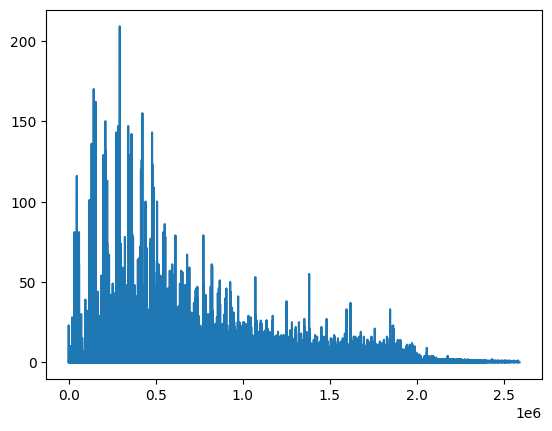

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist)